In [1]:
import numpy as np

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = 8,8

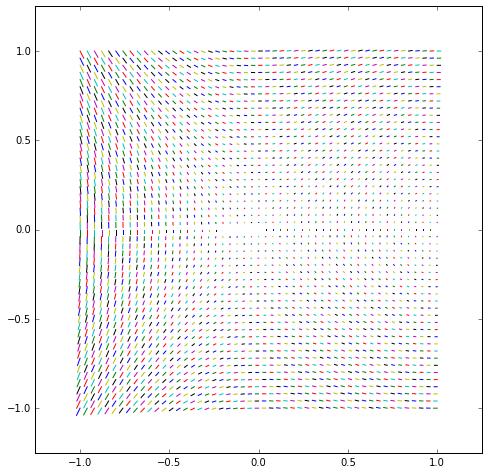

In [73]:
N = 25

dx = 1.0/N

x = np.arange(-1,1+dx, dx)

t = np.arange(0,1,0.5)

z = x[None,...] + 1j*x[...,None]

a = z.real
b = z.imag

dz = b + 1j*(a + 0.01*b - a**2)

w  = z.reshape((2*N+1)**2)

dw = 0.02*dz.reshape((2*N+1)**2)

plt.plot( np.vstack([w.real, (w+dw).real]) , np.vstack([w.imag, (w+dw).imag]) , '-')

plt.xlim([-1.25, 1.25])
plt.ylim([-1.25, 1.25])

plt.show()

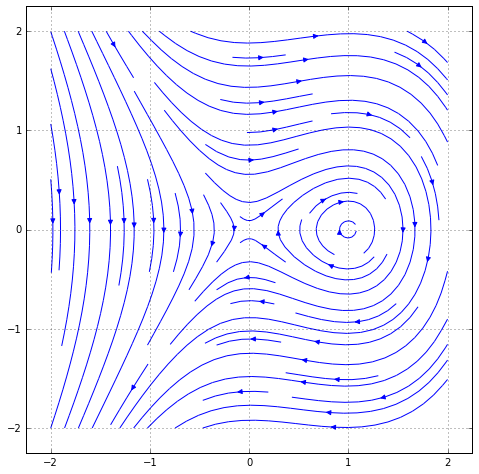

In [77]:
# https://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.streamplot

N  = 25
dx = 1.0/N
x  = np.arange(-2,2+dx, dx)

z = x[None,...] + 1j*x[...,None]

a = z.real
b = z.imag

dz = b + 1j*(a + 0.01*b - a**2)

plt.streamplot(x,x,dz.real, dz.imag)


plt.xlim([-2.25, 2.25])
plt.ylim([-2.25, 2.25])

plt.grid(True)

plt.show()

In [78]:
import inspect

In [80]:
print inspect.getsource(plt.streamplot)

@_autogen_docstring(Axes.streamplot)
def streamplot(x, y, u, v, density=1, linewidth=None, color=None, cmap=None,
               norm=None, arrowsize=1, arrowstyle='-|>', minlength=0.1,
               transform=None, zorder=1, start_points=None, hold=None, data=None):
    ax = gca()
    # allow callers to override the hold state by passing hold=True|False
    washold = ax.ishold()

    if hold is not None:
        ax.hold(hold)
    try:
        ret = ax.streamplot(x, y, u, v, density=density, linewidth=linewidth,
                            color=color, cmap=cmap, norm=norm,
                            arrowsize=arrowsize, arrowstyle=arrowstyle,
                            minlength=minlength, transform=transform,
                            zorder=zorder, start_points=start_points, data=data)
    finally:
        ax.hold(washold)
    sci(ret.lines)
    return ret



In [84]:
print inspect.getsource(plt.gca)

def gca(**kwargs):
    """
    Get the current :class:`~matplotlib.axes.Axes` instance on the
    current figure matching the given keyword args, or create one.

    Examples
    ---------
    To get the current polar axes on the current figure::

        plt.gca(projection='polar')

    If the current axes doesn't exist, or isn't a polar one, the appropriate
    axes will be created and then returned.

    See Also
    --------
    matplotlib.figure.Figure.gca : The figure's gca method.
    """
    return gcf().gca(**kwargs)



In [87]:
import matplotlib.axes as ax

In [88]:
# https://matplotlib.org/api/_as_gen/matplotlib.axes.Axes.streamplot.html

print inspect.getsource(ax.Axes.streamplot)

        @functools.wraps(func)
        def inner(ax, *args, **kwargs):
            # this is needed because we want to change these values if
            # arg_names_at_runtime==True, but python does not allow assigning
            # to a variable in a outer scope. So use some new local ones and
            # set them to the already computed values.
            _label_pos = label_pos
            _label_namer_pos = label_namer_pos
            _arg_names = arg_names

            label = None

            data = kwargs.pop('data', None)
            if data is not None:
                if arg_names_at_runtime:
                    # update the information about replace names and
                    # label position
                    _arg_names = positional_parameter_names(args, data)
                    if (label_namer and  # we actually want a label here ...
                            _arg_names and  # and we can find a label in *args
                            (label_namer in _arg_nam

In [90]:
"""
Streamline plotting for 2D vector fields.

"""

import numpy as np

import matplotlib
import matplotlib.cm as cm
import matplotlib.colors as mcolors
import matplotlib.collections as mcollections
import matplotlib.lines as mlines
import matplotlib.patches as patches


__all__ = ['streamplot']


def streamplot2(axes, x, y, u, v, density=1, linewidth=None, color=None,
               cmap=None, norm=None, arrowsize=1, arrowstyle='-|>',
               minlength=0.1, transform=None, zorder=None, start_points=None,
               maxlength=4.0, integration_direction='both'):
    """Draws streamlines of a vector flow.

    *x*, *y* : 1d arrays
        an *evenly spaced* grid.
    *u*, *v* : 2d arrays
        x and y-velocities. Number of rows should match length of y, and
        the number of columns should match x.
    *density* : float or 2-tuple
        Controls the closeness of streamlines. When `density = 1`, the domain
        is divided into a 30x30 grid---*density* linearly scales this grid.
        Each cell in the grid can have, at most, one traversing streamline.
        For different densities in each direction, use [density_x, density_y].
    *linewidth* : numeric or 2d array
        vary linewidth when given a 2d array with the same shape as velocities.
    *color* : matplotlib color code, or 2d array
        Streamline color. When given an array with the same shape as
        velocities, *color* values are converted to colors using *cmap*.
    *cmap* : :class:`~matplotlib.colors.Colormap`
        Colormap used to plot streamlines and arrows. Only necessary when using
        an array input for *color*.
    *norm* : :class:`~matplotlib.colors.Normalize`
        Normalize object used to scale luminance data to 0, 1. If None, stretch
        (min, max) to (0, 1). Only necessary when *color* is an array.
    *arrowsize* : float
        Factor scale arrow size.
    *arrowstyle* : str
        Arrow style specification.
        See :class:`~matplotlib.patches.FancyArrowPatch`.
    *minlength* : float
        Minimum length of streamline in axes coordinates.
    *start_points*: Nx2 array
        Coordinates of starting points for the streamlines.
        In data coordinates, the same as the ``x`` and ``y`` arrays.
    *zorder* : int
        any number
    *maxlength* : float
        Maximum length of streamline in axes coordinates.
    *integration_direction* : ['forward', 'backward', 'both']
        Integrate the streamline in forward, backward or both directions.

    Returns:

        *stream_container* : StreamplotSet
            Container object with attributes

                - lines: `matplotlib.collections.LineCollection` of streamlines

                - arrows: collection of `matplotlib.patches.FancyArrowPatch`
                  objects representing arrows half-way along stream
                  lines.

            This container will probably change in the future to allow changes
            to the colormap, alpha, etc. for both lines and arrows, but these
            changes should be backward compatible.

    """
    grid = Grid(x, y)
    mask = StreamMask(density)
    dmap = DomainMap(grid, mask)

    if zorder is None:
        zorder = mlines.Line2D.zorder

    # default to data coordinates
    if transform is None:
        transform = axes.transData

    if color is None:
        color = axes._get_lines.get_next_color()

    if linewidth is None:
        linewidth = matplotlib.rcParams['lines.linewidth']

    line_kw = {}
    arrow_kw = dict(arrowstyle=arrowstyle, mutation_scale=10 * arrowsize)

    if integration_direction not in ['both', 'forward', 'backward']:
        errstr = ("Integration direction '%s' not recognised. "
                  "Expected 'both', 'forward' or 'backward'." %
                  integration_direction)
        raise ValueError(errstr)

    if integration_direction == 'both':
        maxlength /= 2.

    use_multicolor_lines = isinstance(color, np.ndarray)
    if use_multicolor_lines:
        if color.shape != grid.shape:
            raise ValueError(
                "If 'color' is given, must have the shape of 'Grid(x,y)'")
        line_colors = []
        color = np.ma.masked_invalid(color)
    else:
        line_kw['color'] = color
        arrow_kw['color'] = color

    if isinstance(linewidth, np.ndarray):
        if linewidth.shape != grid.shape:
            raise ValueError(
                "If 'linewidth' is given, must have the shape of 'Grid(x,y)'")
        line_kw['linewidth'] = []
    else:
        line_kw['linewidth'] = linewidth
        arrow_kw['linewidth'] = linewidth

    line_kw['zorder'] = zorder
    arrow_kw['zorder'] = zorder

    ## Sanity checks.
    if u.shape != grid.shape or v.shape != grid.shape:
        raise ValueError("'u' and 'v' must be of shape 'Grid(x,y)'")

    u = np.ma.masked_invalid(u)
    v = np.ma.masked_invalid(v)

    integrate = get_integrator(u, v, dmap, minlength, maxlength,
                               integration_direction)

    trajectories = []
    if start_points is None:
        for xm, ym in _gen_starting_points(mask.shape):
            if mask[ym, xm] == 0:
                xg, yg = dmap.mask2grid(xm, ym)
                t = integrate(xg, yg)
                if t is not None:
                    trajectories.append(t)
    else:
        sp2 = np.asanyarray(start_points, dtype=float).copy()

        # Check if start_points are outside the data boundaries
        for xs, ys in sp2:
            if not (grid.x_origin <= xs <= grid.x_origin + grid.width
                    and grid.y_origin <= ys <= grid.y_origin + grid.height):
                raise ValueError("Starting point ({}, {}) outside of data "
                                 "boundaries".format(xs, ys))

        # Convert start_points from data to array coords
        # Shift the seed points from the bottom left of the data so that
        # data2grid works properly.
        sp2[:, 0] -= grid.x_origin
        sp2[:, 1] -= grid.y_origin

        for xs, ys in sp2:
            xg, yg = dmap.data2grid(xs, ys)
            t = integrate(xg, yg)
            if t is not None:
                trajectories.append(t)

    if use_multicolor_lines:
        if norm is None:
            norm = mcolors.Normalize(color.min(), color.max())
        if cmap is None:
            cmap = cm.get_cmap(matplotlib.rcParams['image.cmap'])
        else:
            cmap = cm.get_cmap(cmap)

    streamlines = []
    arrows = []
    for t in trajectories:
        tgx = np.array(t[0])
        tgy = np.array(t[1])
        # Rescale from grid-coordinates to data-coordinates.
        tx, ty = dmap.grid2data(*np.array(t))
        tx += grid.x_origin
        ty += grid.y_origin

        points = np.transpose([tx, ty]).reshape(-1, 1, 2)
        streamlines.extend(np.hstack([points[:-1], points[1:]]))

        # Add arrows half way along each trajectory.
        s = np.cumsum(np.sqrt(np.diff(tx) ** 2 + np.diff(ty) ** 2))
        n = np.searchsorted(s, s[-1] / 2.)
        arrow_tail = (tx[n], ty[n])
        arrow_head = (np.mean(tx[n:n + 2]), np.mean(ty[n:n + 2]))

        if isinstance(linewidth, np.ndarray):
            line_widths = interpgrid(linewidth, tgx, tgy)[:-1]
            line_kw['linewidth'].extend(line_widths)
            arrow_kw['linewidth'] = line_widths[n]

        if use_multicolor_lines:
            color_values = interpgrid(color, tgx, tgy)[:-1]
            line_colors.append(color_values)
            arrow_kw['color'] = cmap(norm(color_values[n]))

        p = patches.FancyArrowPatch(
            arrow_tail, arrow_head, transform=transform, **arrow_kw)
        axes.add_patch(p)
        arrows.append(p)

    lc = mcollections.LineCollection(
        streamlines, transform=transform, **line_kw)
    lc.sticky_edges.x[:] = [grid.x_origin, grid.x_origin + grid.width]
    lc.sticky_edges.y[:] = [grid.y_origin, grid.y_origin + grid.height]
    if use_multicolor_lines:
        lc.set_array(np.ma.hstack(line_colors))
        lc.set_cmap(cmap)
        lc.set_norm(norm)
    axes.add_collection(lc)
    axes.autoscale_view()

    ac = matplotlib.collections.PatchCollection(arrows)
    stream_container = StreamplotSet(lc, ac)
    return stream_container

NameError: global name 'Grid' is not defined

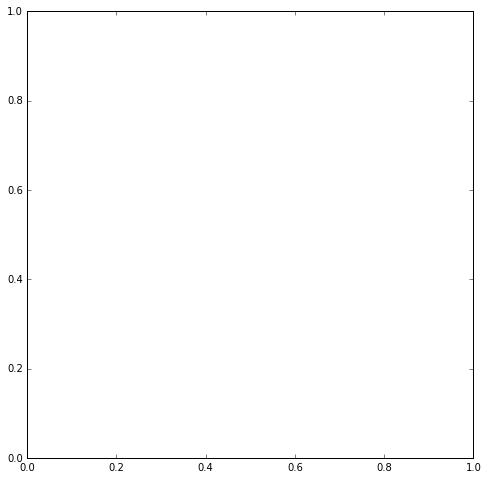

In [96]:
N  = 25
dx = 1.0/N
x  = np.arange(-2,2+dx, dx)
y  = x

z = x[None,...] + 1j*x[...,None]

a = z.real
b = z.imag

dz = b + 1j*(a + 0.01*b - a**2)

ax = plt.gca()

streamplot2(ax, x,x,dz.real, dz.imag)


#plt.xlim([-2.25, 2.25])
#plt.ylim([-2.25, 2.25])
#plt.grid(True)
#plt.show()

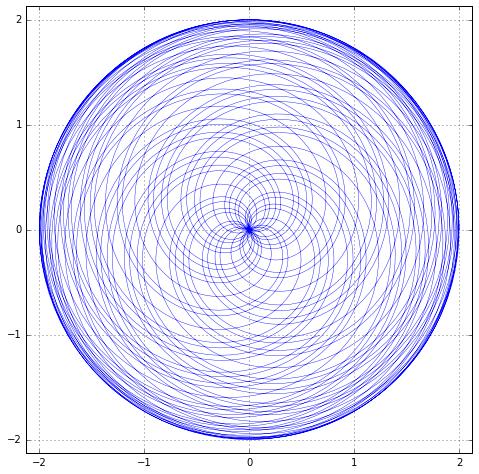

In [24]:
t = np.arange(0,50,0.01)

#sqrt =  1 + 1.0/(2 + 1.0/(2 + 1.0/(2 + 1.0/2)))
sqrt =  2**0.5

z = np.exp(2j*np.pi*t) + np.exp(2j*sqrt*np.pi*t)

plt.plot(z.real, z.imag, '-', linewidth=0.4)


plt.xlim(-2.125,2.125)
plt.ylim(-2.125,2.125)
plt.grid(True)

In [25]:
sqrt1 =  1 + 1.0/(2 + 1.0/(2 + 1.0/(2 + 1.0/2)))
sqrt2 =  2**0.5

sqrt1,sqrt2

(1.4137931034482758, 1.4142135623730951)